## Feature Engineering

In [1]:
# Import libraries for machine learning models 
import numpy as np 
import pandas as pd 
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Load the dataset
laptop_df = pd.read_csv("ebay_laptop_data_cleaned.csv", index_col=0)
laptop_df.head()

,Brand,Price,Color,Features,Condition,Condition Description,Seller Note,GPU,Processor,Processor Speed,Type,Display Width,Display Height,OS,Storage Type,Hard Drive Capacity,SSD Capacity,Screen Size (inch),Ram Size
1,dell,400.00,black,"Backlit Keyboard, Bluetooth, Built-in Micropho...",Very Good - Refurbished,The item shows minimal wear and is backed by a...,aaa pcs is a microsoft authorized refurbisher ...,intel,intel core i7 8th generation,4.2,notebook/laptop,1920.0,1080.0,windows,ssd,2000.00,205.95,14.0,5.98
2,dell,175.00,black,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",Used,An item that has been used previously. The ite...,"well kept, fully functional, includes battery,...",intel,intel core i5-6300u,2.4,notebook/laptop,1920.0,1080.0,windows,ssd,500.00,500.00,14.0,16.00
3,hp,85.00,black,"Bluetooth, Built-in Microphone, Built-in Webca...",Good - Refurbished,The item shows moderate wear and is backed by ...,1-year allstate warranty. the original hp char...,intel,intel celeron n,2.4,notebook/laptop,1366.0,768.0,chrome,emmc,16.00,205.95,11.6,4.00
4,dell,101.25,other,"10/100 LAN Card, Built-in Microphone, Built-in...",Good - Refurbished,The item shows moderate wear and is backed by ...,laptops is tested & fully working with some si...,other,intel core i5 6th generation,1.4,notebook/laptop,1366.0,768.0,windows,ssd,98.89,256.00,12.5,8.00
5,acer,50.00,black,"Touchscreen, Bluetooth",Undefined,Undefined,undefined,other,intel celeron,1.6,notebook/laptop,1366.0,768.0,chrome,ssd,98.89,16.00,11.6,4.00


In [4]:
# Reidentify the dataset
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2471 entries, 1 to 4182
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  2471 non-null   object 
 1   Price                  2471 non-null   float64
 2   Color                  2471 non-null   object 
 3   Features               2471 non-null   object 
 4   Condition              2471 non-null   object 
 5   Condition Description  2471 non-null   object 
 6   Seller Note            2471 non-null   object 
 7   GPU                    2471 non-null   object 
 8   Processor              2471 non-null   object 
 9   Processor Speed        2471 non-null   float64
 10  Type                   2471 non-null   object 
 11  Display Width          2471 non-null   float64
 12  Display Height         2471 non-null   float64
 13  OS                     2471 non-null   object 
 14  Storage Type           2471 non-null   object 
 15  Hard Driv

Approach: Feature Engineering

+ Correlation Analysis: Creating correlation maps for new features with stronger correlation index
+ Feature Extraction: Creating new features from categorical variables (Features, Type, Condition)
+ Feature Encoding: encode all categorical variables
+ Feature Selection: removing irrelevant data (Condition Description, Seller Note)
+ Feature Transformation: converting the english units to SI-units (inch to meters)

This project, the Price variable is considered as the target variable on which the model makes predictions based on the features of the laptop. The objective is to find and create features that might be effective and meaningful for the model to train and learn. This will be handled through these techniques of feature engineering, like feature creation, encoding, transformation and correlation analysis. Feature selection is used to select the features based on strong positive correlation and negative correlation.

## Correlation Analysis

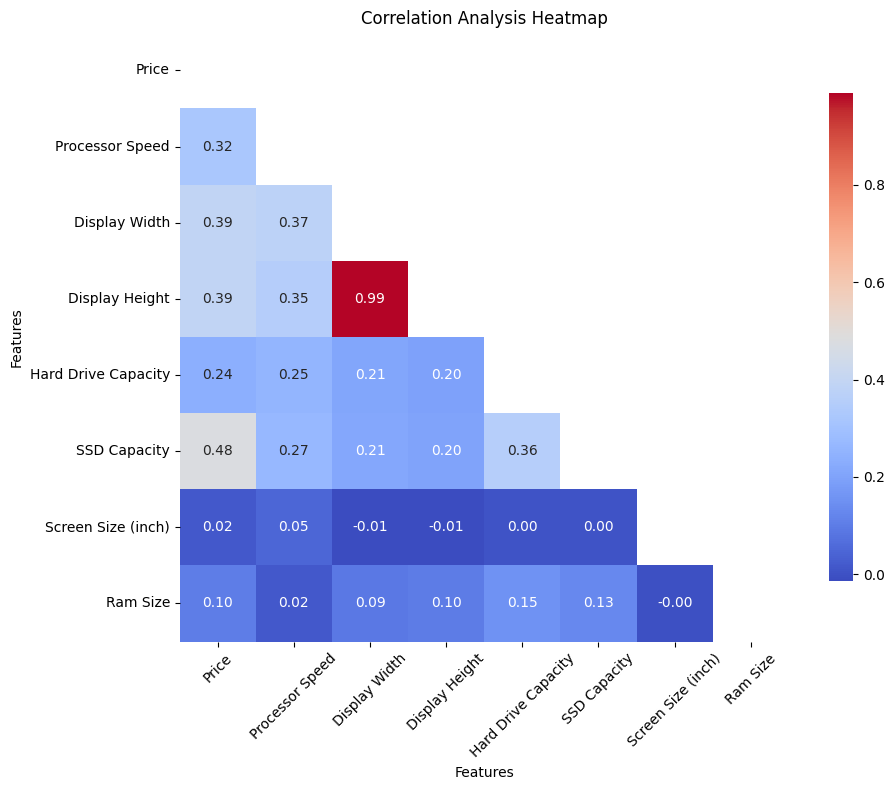

In [5]:
# create a correlation analysis heatmap 
laptop_numerics = laptop_df.select_dtypes(include=[np.number])

def correlation_analysis(num_df, x=None, y=None):
    # Create correlation table 
    corr_table = num_df.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_table, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_table, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
    plt.title("Correlation Analysis Heatmap")
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Call function to create a correlation analysis heatmap
correlation_analysis(laptop_numerics, "Price", "Rating")

## Feature Transformation

+ Converting features to SI units
+ Data Normalization

In [6]:
# Convert all english units to SI - units
# laptop_df["Screen Size (inch)"] = laptop_df["Screen Size (inch)"].apply(lambda x: x*2.54)
laptop_df.rename(columns={"Screen Size (inch)": "Screen Size (cm)"}, inplace=True)
laptop_df["Screen Size (cm)"].head()

1    14.0
2    14.0
3    11.6
4    12.5
5    11.6
Name: Screen Size (cm), dtype: float64

## Feature Engineering

Created features to increase correlation rate with price feature are
+ Total Price
+ Price/Screen Width and Price/Screen Height
+ Price/Screen Size

In [7]:
# Create new features: total price, price/screen width, price/screen height, price/screen size
laptop_df["Price per Screen Size"] = laptop_df["Price"]/laptop_df["Screen Size (cm)"] 
laptop_df["Price per Display Height"] = laptop_df["Price"]/laptop_df["Display Height"]
laptop_df["Price per Display Width"] = laptop_df["Price"]/laptop_df["Display Width"]

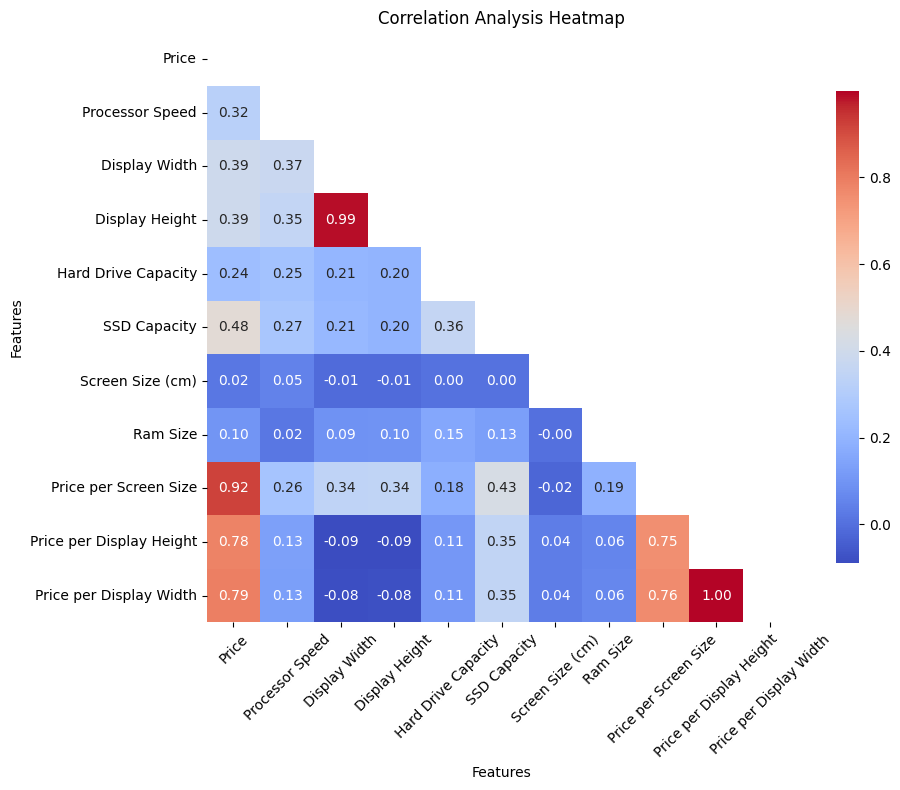

In [8]:
laptop_df.head()
correlation_analysis(laptop_df.select_dtypes([np.number]))

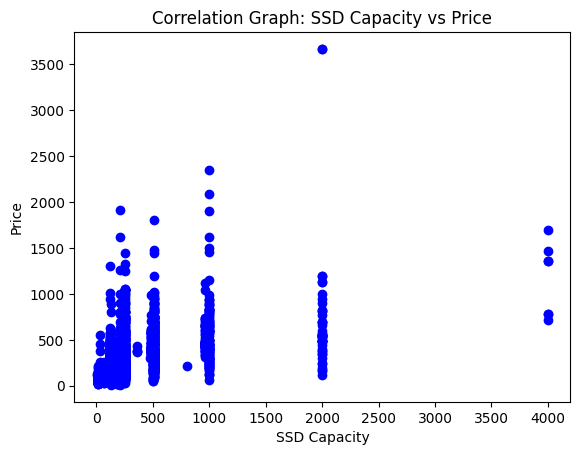

In [9]:
# Visualise correlation with input feature and price
def correlation_graph(x,y = "Price", color="blue"):
    feature = laptop_df[x].values
    target = laptop_df[y].values 

    plt.scatter(feature, target, color=color)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Correlation Graph: {x} vs {y}")
    plt.show()

# correlation_graph("Price per Screen Size",)
# correlation_graph("Price per Display Height")
# correlation_graph("Ram Size")
correlation_graph("SSD Capacity")

## Feature Extraction + Encoding

+ Extracting categorical values from selected features
+ Encode the features with label encoding

Features for extraction are:
+ Feature
+ Processor 
+ Type
+ OS


**Feature 1: Feature**

new features to be extracted
+ Bluetooth: yes/no
+ Touchscreen: yes/no
+ WiFi: yes/no
+ Webcam: yes/no

In [10]:
# Iterate the feauture variable of laptop
for i, f_value in enumerate(laptop_df["Features"][:5]):
    print(i, f_value)

# Extract value and create new binary features
laptop_df["Bluetooth"] = laptop_df["Features"].apply(lambda text: "Yes" if "Bluetooth" in text else "No")
laptop_df["Touchscreen"] = laptop_df["Features"].apply(lambda text: "Yes" if "Touchscreen" in text else "No")
laptop_df["WiFi"] = laptop_df["Features"].apply(lambda text: "Yes" if "Wi-Fi" in text else "No")
laptop_df["Webcam"] = laptop_df["Features"].apply(lambda text: "Yes" if "Webcam" in text else "No")

0 Backlit Keyboard, Bluetooth, Built-in Microphone, Built-in Webcam, LTE, Multi-Touch Trackpad, Widescreen Display, Wi-Fi
1 10/100 LAN Card, Backlit Keyboard, Bluetooth, Built-in Microphone, Built-in Webcam, Touchscreen, Widescreen Display, Wi-Fi
2 Bluetooth, Built-in Microphone, Built-in Webcam, Widescreen Display, Wi-Fi
3 10/100 LAN Card, Built-in Microphone, Built-in Webcam, Wi-Fi
4 Touchscreen, Bluetooth


**Feature 2: Processor**

New features created from processor: Processor Type

In [11]:
# Identify the processor type
laptop_not_app = laptop_df[laptop_df["Processor"] == "not applicable"]
laptop_not_app["Brand"].value_counts()
laptop_not_app["Brand"].unique()

# identify all forms of processor types 
for proc_type in laptop_df["Processor"].unique():
    print(proc_type)

intel core i7 8th generation
intel core i5-6300u
intel celeron n
intel core i5 6th generation
intel celeron
intel celeron dual-core
i7 7th
intel core i3 10th generation
8350u,  core i5
intel core i5 12th generation
intel core i5 7th generation
intel core i5 8th generation
intel core i7 13th generation
amd ryzen 5
i5-8365u
intel core i5 4th generation
intel core i5-1135g7
intel celeron n3160
i5-7200u
intel core i7 12th generation
intel core i5-4300u
i7-7820hq
intel core i5-4200u
intel core i5-8250u
intel core i7 13th gen
intel core i3 6th generation
intel i5
intel core i5
amd a4 dual-core
intel core i7 6th generation
not applicable
intel core i5 2nd generation
nvidia tegra 3
i5-7300hq
core i7
intel core i3-6100u
intel core i7
intel core i5-3320m
intel core i5 11th generation
mediatek mt8183
intel core i5 13th generation
intel core i5 10th generation
intel core i5 6th gen
intel core i5-8265u
intel core i3 11th generation
intel core i5-10310u
intel core i7 4th generation
amd ryzen 3pro
ce

**Remark: ** we will reconsider this task further. Until now, the features that have already beene extracted and engineered will be sufficient to be taken account into the model development process. As the model performs weak, this phase will be recosndired and necessary steps and techniques will be undertaken. 

## Feature Selection

Selecting features by removing irrelevant features 

In [12]:
# Filter out irrelevant features 
irr_features = ["Features", "Condition","Condition Description", "Seller Note", "Processor", "Type"]
laptop_df.drop(columns=irr_features, inplace=True)
laptop_df.head()

,Brand,Price,Color,GPU,Processor Speed,Display Width,Display Height,OS,Storage Type,Hard Drive Capacity,SSD Capacity,Screen Size (cm),Ram Size,Price per Screen Size,Price per Display Height,Price per Display Width,Bluetooth,Touchscreen,WiFi,Webcam
1,dell,400.00,black,intel,4.2,1920.0,1080.0,windows,ssd,2000.00,205.95,14.0,5.98,28.571429,0.370370,0.208333,Yes,No,Yes,Yes
2,dell,175.00,black,intel,2.4,1920.0,1080.0,windows,ssd,500.00,500.00,14.0,16.00,12.500000,0.162037,0.091146,Yes,Yes,Yes,Yes
3,hp,85.00,black,intel,2.4,1366.0,768.0,chrome,emmc,16.00,205.95,11.6,4.00,7.327586,0.110677,0.062225,Yes,No,Yes,Yes
4,dell,101.25,other,other,1.4,1366.0,768.0,windows,ssd,98.89,256.00,12.5,8.00,8.100000,0.131836,0.074122,No,No,Yes,Yes
5,acer,50.00,black,other,1.6,1366.0,768.0,chrome,ssd,98.89,16.00,11.6,4.00,4.310345,0.065104,0.036603,Yes,Yes,No,No


In [14]:
# save the dataset 
path = "D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\dataset"
filename = os.path.join(path, "ebay_laptop_data_phase3.csv")
laptop_df.to_csv(filename, index=False)

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\mian_\AppData\Local\Temp\ipykernel_19868\2831927146.py:2: SyntaxWarning: invalid escape sequence '\P'
  path = "D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\dataset"
